In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [11]:
import pandas as pd

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.vq import whiten

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv("comic_con.csv")
df[:3]

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000


### Hierarchical Clustering: Ward Method

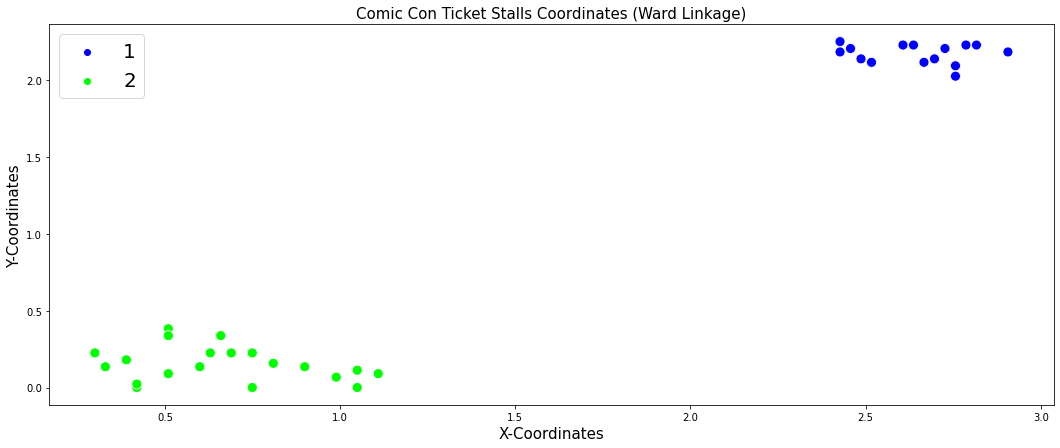

In [4]:
# Use the linkage() function
distance_matrix = linkage(df[["x_scaled", "y_scaled"]],
                          method = "ward",
                          metric = "euclidean")

# Assign cluster labels
df["cluster_labels"] = fcluster(distance_matrix,
                                2,
                                criterion = "maxclust")

# Plot clusters
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled",
                y = "y_scaled",
                hue = "cluster_labels",
                s = 100,
                data = df,
                palette = "brg")
plt.title("Comic Con Ticket Stalls Coordinates (Ward Linkage)", size = 15)
plt.xlabel("X-Coordinates", size = 15)
plt.ylabel("Y-Coordinates", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.show()

### Hierarchical Clustering: Single Method

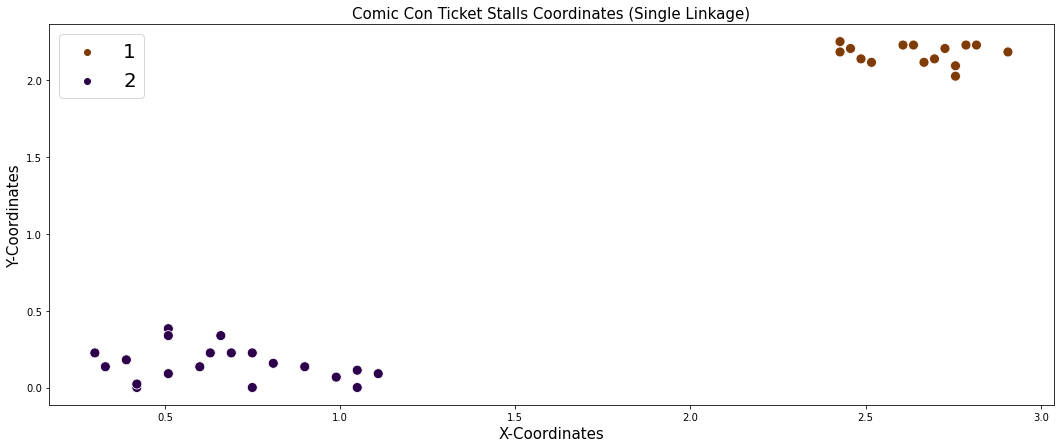

In [5]:
# Use the linkage() function
distance_matrix = linkage(df[["x_scaled", "y_scaled"]],
                          method = "single",
                          metric = "euclidean")

# Assign cluster labels
df["cluster_labels"] = fcluster(distance_matrix,
                                2,
                                criterion = "maxclust")

# Plot clusters
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled",
                y = "y_scaled",
                hue = "cluster_labels",
                s = 100,
                palette = "PuOr",
                data = df)
plt.title("Comic Con Ticket Stalls Coordinates (Single Linkage)", size = 15)
plt.xlabel("X-Coordinates", size = 15)
plt.ylabel("Y-Coordinates", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.show()

### Hierarchical Clustering: Complete Method

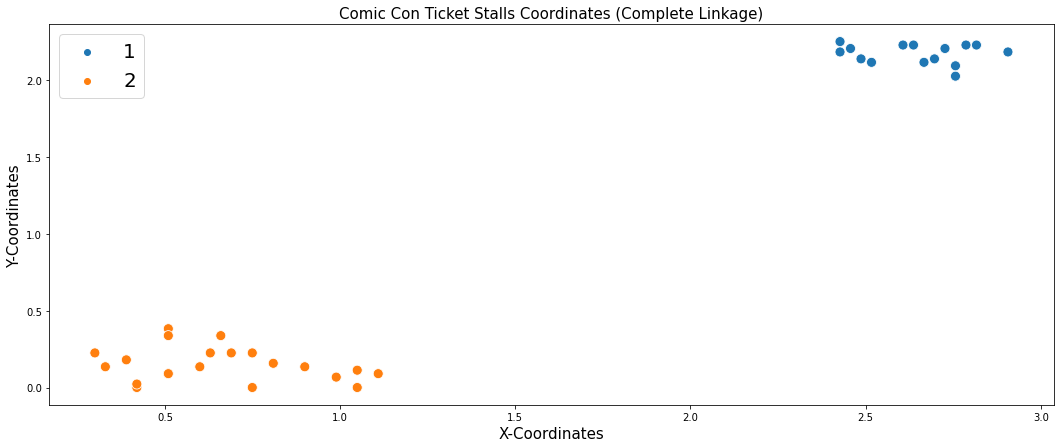

In [6]:
# Use the linkage() function
distance_matrix = linkage(df[["x_scaled", "y_scaled"]],
                          method = "complete",
                          metric = "euclidean")

# Assign cluster labels
df["cluster_labels"] = fcluster(distance_matrix,
                                2,
                                criterion = "maxclust")

# Plot clusters
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled", 
                y = "y_scaled",
                hue = "cluster_labels",
                s = 100,
                palette = "tab10",
                data = df)
plt.title("Comic Con Ticket Stalls Coordinates (Complete Linkage)", size = 15)
plt.xlabel("X-Coordinates", size = 15)
plt.ylabel("Y-Coordinates", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.show()

### Visualize Clusters with Seaborn

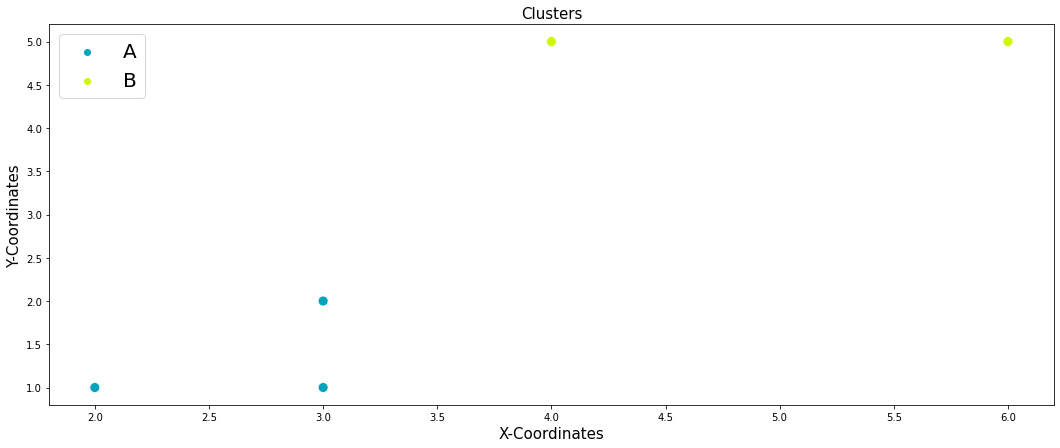

In [7]:
df = pd.DataFrame({"x": [3, 3, 4, 6, 2],
                   "y": [1, 2, 5, 5, 1],
                   "labels": ["A", "A", "B", "B", "A"]})

plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x", 
                y = "y",
                hue = "labels",
                s = 100,
                palette = "nipy_spectral",
                data = df)
plt.title("Clusters", size = 15)
plt.xlabel("X-Coordinates", size = 15)
plt.ylabel("Y-Coordinates", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.show()

### Dendrogram in Scipy

In [8]:
df = pd.read_csv("comic_con.csv")
df[:3]

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000


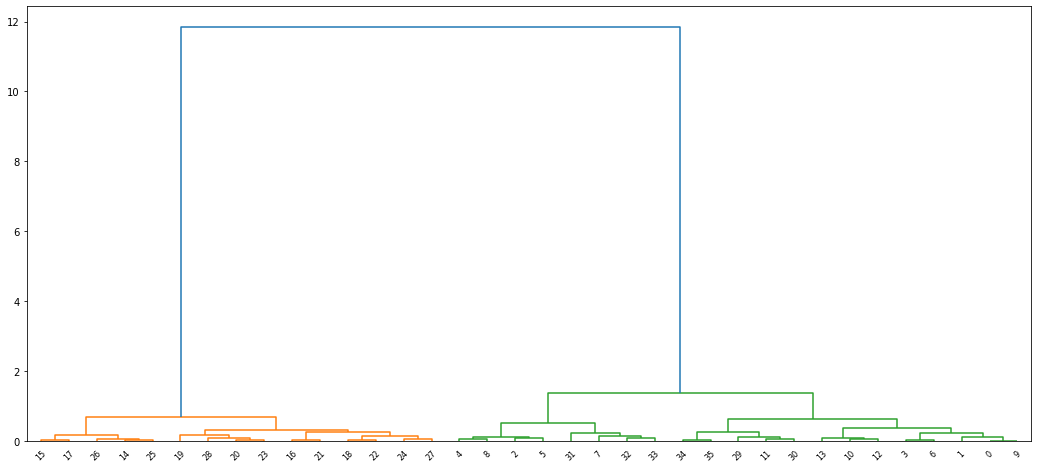

In [9]:
distance_matrix = linkage(df[["x_scaled", "y_scaled"]],
                          method = "ward",
                          metric = "euclidean")

plt.figure(figsize = (18, 8))
dn = dendrogram(distance_matrix)
plt.show()

### FIFA 18: Exploring Defenders

In [10]:
df = pd.read_csv("fifa_18_dataset.csv")
df[:3]

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56


In [20]:
# Use the whiten() function to standardize the data
scaled_data = whiten(df)
scaled_data = pd.DataFrame(scaled_data, columns = ["scaled_sliding_tackle", "scaled_aggression"])
scaled_data[:3]

,scaled_sliding_tackle,scaled_aggression
0,1.070924,3.609257
1,1.210610,2.749910
2,1.536544,3.208228


In [21]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(scaled_data[["scaled_sliding_tackle", "scaled_aggression"]],
                          method = "ward")

# Assign cluster labels to each row of data
scaled_data["cluster_labels"] = fcluster(distance_matrix,
                                         3,
                                         criterion = "maxclust")

In [23]:
# Display cluster centers of each cluster
scaled_data[["scaled_sliding_tackle", "scaled_aggression", "cluster_labels"]].groupby("cluster_labels").mean()

,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,0.987373,1.849142
2,3.013487,4.063492
3,1.934455,3.210802


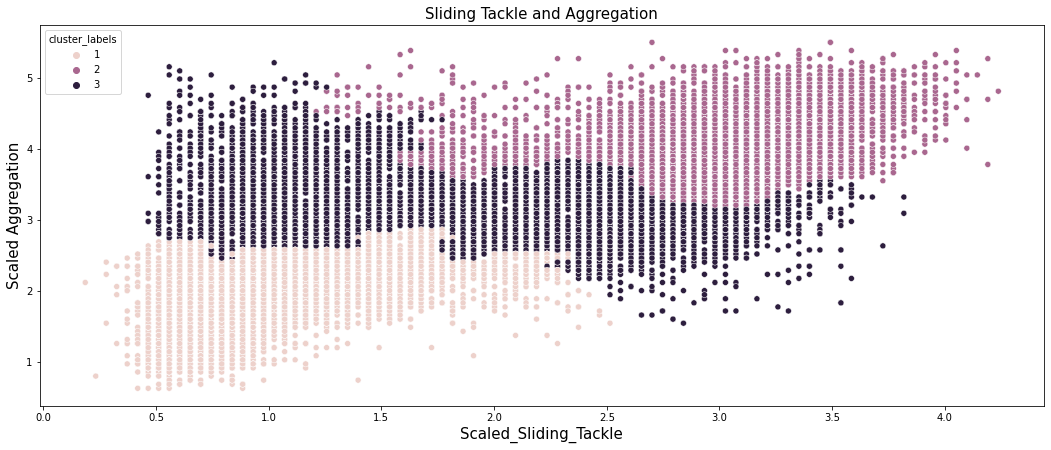

In [26]:
# Create a scatter plot through seaborn
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "scaled_sliding_tackle",
                y = "scaled_aggression",
                hue = "cluster_labels",
                data = scaled_data)
plt.title("Sliding Tackle and Aggregation", size = 15)
plt.xlabel("Scaled_Sliding_Tackle", size = 15)
plt.ylabel("Scaled Aggregation", size = 15)
plt.show()